In [ ]:
!pip install pydub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import scipy
#from keras.optimizer_v1 import Adam
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten,Dropout,
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dropout
#from keras.utils import plot_model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
#from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg
from pydub import AudioSegment
import shutil
import keras
from keras.preprocessing.image import ImageDataGenerator
import random
import keras.backend as K
genres = ['blues', 'classical', 'country', 'disco', 'pop', 'hiphop', 'metal', 'reggae', 'rock']



In [ ]:
os.makedirs('/content/drive/MyDrive/spectrograms')
os.makedirs('/content/drive/MyDrive/train-data')
os.makedirs('/content/drive/MyDrive/test-data')

for gen in genres:
  path_audio = os.path.join('/content/drive/MyDrive/audio3secs',f'{gen}')
  os.makedirs(path_audio)
  path_train = os.path.join('/content/drive/MyDrive/spectrograms/train-data',f'{gen}')
  path_test = os.path.join('/content/drive/MyDrive/spectrograms/test-data',f'{gen}')
  os. makedirs(path_train)
  os. makedirs(path_test)
  imagess = os.path.join('/content/drive/MyDrive/spectrograms/images', f'{gen}')
  os.makedirs(imagess)

In [ ]:
i = 0
for gen in genres:
  j=0
  print(f"{gen}")
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/genres',f"{gen}")):

    song  =  os.path.join(f'/content/drive/MyDrive/genres/{gen}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      t1 = 3*w*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'/content/drive/MyDrive/audio3secs/{gen}/{gen+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
pop
hiphop
metal
reggae
rock


hiphop


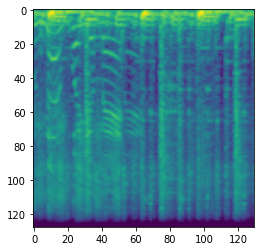

In [ ]:
genre= ['hiphop']
for g in genre:
  j = 0
  print(g)
  
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/audio3secs',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/audio3secs/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvasAgg(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms/images/{g}/{g+str(j)}.png')

country


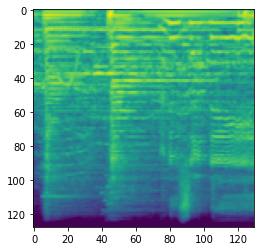

In [ ]:
genre= ['country']
for g in genre:
  j = 0
  print(g)
  
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/audio3secs',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/audio3secs/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvasAgg(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms/images/{g}/{g+str(j)}.png')

pop


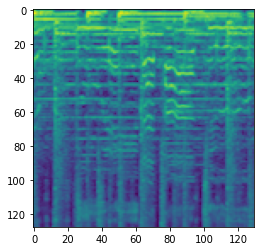

In [ ]:
genre= ['pop']
for g in genre:
  j = 0
  print(g)
  
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/audio3secs',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/audio3secs/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvasAgg(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms/images/{g}/{g+str(j)}.png')

metal


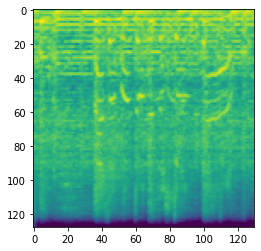

In [ ]:
genre= ['metal']
for g in genre:
  j = 0
  print(g)
  
  for filename in os.listdir(os.path.join('/content/drive/MyDrive/audio3secs',f"{g}")):
    song  =  os.path.join(f'/content/drive/MyDrive/audio3secs/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvasAgg(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/spectrograms/train-data/{g}/{g+str(j)}.png')

In [ ]:
directory = "/content/drive/MyDrive/spectrograms/train-data/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]

  for f in test_files:

    shutil.move(directory + f"{g}"+ "/" + f,"/content/drive/MyDrive/spectrograms/test-data/" + f"{g}")


In [ ]:
train_dir = "/content/drive/MyDrive/spectrograms/train-data/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode='grayscale',class_mode='categorical',batch_size=128)

validation_dir = "/content/drive/MyDrive/spectrograms/test-data/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='grayscale',class_mode='categorical',batch_size=128)


Found 8100 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
import keras.backend as K
def GenreModel(input_shape = (288,432,4),classes=9):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  X = Dropout(rate=0.3)(X)

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model


  
model = GenreModel(input_shape=(288,432,4),classes=9)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1]) 

model.fit(train_generator,epochs=37,validation_data=vali_generator)

Epoch 1/37
21/64 [========>.....................] - ETA: 26:26 - loss: 2.3446 - accuracy: 0.3393 - get_f1: 0.3112

In [ ]:
from keras.layers import Input, Dense, Bidirectional, LSTM, Dropout, Activation, GRU
from keras.layers import Conv2D, concatenate, MaxPooling2D, Flatten, Embedding, Lambda
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from tensorflow.keras.optimizers import RMSprop,Adam
nb_filters1=16 
nb_filters2=32 
nb_filters3=64
nb_filters4=64
nb_filters5=64
ksize = (3,1)
pool_size_1= (2,2) 
pool_size_2= (4,4)
pool_size_3 = (4,2)

dropout_prob = 0.20
dense_size1 = 128
lstm_count = 64
num_units = 120

BATCH_SIZE = 64
EPOCH_COUNT = 50
L2_regularization = 0.001

def conv_recurrent_model_build(model_input):
    print('Building model...')
    layer = model_input
    
    ### Convolutional blocks
    conv_1 = Conv2D(filters = nb_filters1, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_1')(layer)
    pool_1 = MaxPooling2D(pool_size_1)(conv_1)

    conv_2 = Conv2D(filters = nb_filters2, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_2')(pool_1)
    pool_2 = MaxPooling2D(pool_size_1)(conv_2)

    conv_3 = Conv2D(filters = nb_filters3, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_3')(pool_2)
    pool_3 = MaxPooling2D(pool_size_1)(conv_3)
    
    
    conv_4 = Conv2D(filters = nb_filters4, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_4')(pool_3)
    pool_4 = MaxPooling2D(pool_size_2)(conv_4)
    
    
    conv_5 = Conv2D(filters = nb_filters5, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_5')(pool_4)
    pool_5 = MaxPooling2D(pool_size_2)(conv_5)

    flatten1 = Flatten()(pool_5)
    ### Recurrent Block
    
    # Pooling layer
    pool_lstm1 = MaxPooling2D(pool_size_3, name = 'pool_lstm')(layer)
    
    # Embedding layer

    squeezed = Lambda(lambda x: K.squeeze(x, axis= -1))(pool_lstm1)
#     flatten2 = K.squeeze(pool_lstm1, axis = -1)
#     dense1 = Dense(dense_size1)(flatten)
    
    # Bidirectional GRU
    lstm = Bidirectional(GRU(lstm_count))(squeezed)  #default merge mode is concat
    
    # Concat Output
    concat = concatenate([flatten1, lstm], axis=-1, name ='concat')
    
    ## Softmax Output
    output = Dense(9, activation = 'softmax', name='preds')(concat)
    
    model_output = output
    model = Model(model_input, model_output)
    
#     opt = Adam(lr=0.001)
    opt = RMSprop(learning_rate=0.0005)  # Optimizer
    model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy',get_f1]
        )
    
    print(model.summary())
    return model
checkpoint_callback = ModelCheckpoint('./models/parallel/weights.best.h5', monitor='val_acc', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(
                monitor='val_acc', factor=0.5, patience=10, min_delta=0.01,
                verbose=1
            )    
callbacks_list = [checkpoint_callback, reducelr_callback]

model_input = Input((288,432,1), name='input')
model=conv_recurrent_model_build(model_input)
model.fit(train_generator,epochs=60,validation_data=vali_generator,verbose=1, callbacks=callbacks_list)

Building model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 288, 432, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 286, 432, 16  64          ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 143, 216, 16  0           ['conv_1[0][0]']                 
                                )                                           

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/cnn_ai_proj_model/model2/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/cnn_ai_proj_model/model2/model.h5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cnn_ai_proj_model/model/assets


In [ ]:
!pip install Tkinter

ERROR: Could not find a version that satisfies the requirement Tkinter (from versions: none)
ERROR: No matching distribution found for Tkinter


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


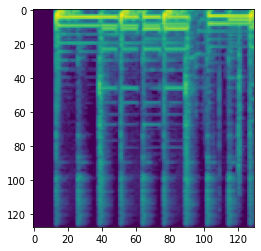

In [ ]:
j=0
for filename in os.listdir(os.path.join('/content/drive/MyDrive/test-data',f"")):
    song  =  os.path.join(f'/content/drive/MyDrive/test-data/',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvasAgg(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'/content/drive/MyDrive/test-data/{str(j)}.png')


In [ ]:
from keras.models import model_from_json

json_file = open('/content/drive/MyDrive/cnn_ai_proj_model/model2/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/cnn_ai_proj_model/model2/model.h5")

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
!pip install scikit-learn

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from keras.preprocessing.image import load_img,img_to_array
def convert_mp3_to_wav(music_file):
  sound = AudioSegment.from_mp3(music_file)
  sound.export("music_file.wav",format="wav")

def extract_relevant(wav_file,t1,t2):
  wav = AudioSegment.from_wav(wav_file)
  wav = wav[1000*t1:1000*t2]
  wav.export("extracted.wav",format='wav')

def create_melspectrogram(wav_file):
  y,sr = librosa.load(wav_file,duration=3)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig('melspectrogram.png')

def predict(image_data,model):

  #image = image_data.resize((288,432))
  image = img_to_array(image_data)

  image = np.reshape(image,(1,288,432,4))

  prediction = model.predict(image/255)

  prediction = prediction.reshape((9,)) 


  class_label = np.argmax(prediction)

  
  return class_label,prediction


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import sklearn

prediction = model.predict(img_preprocessed/255)
prediction = prediction.reshape((9,)) 
class_label = np.argmax(prediction)
prediction = prediction.reshape((9,))

print(prediction)

[3.665732e-06 9.998558e-01 1.615051e-05 8.296097e-06 9.536414e-05
 2.852680e-07 3.364137e-08 9.417875e-08 2.031175e-05]


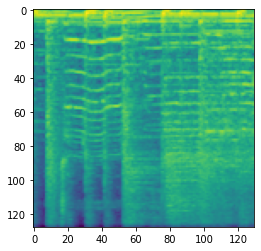

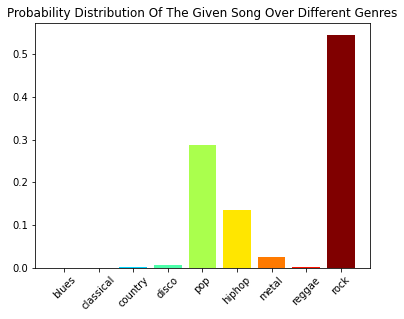

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
color_data = [1,2,3,4,5,6,7,8,9]
convert_mp3_to_wav("/content/drive/MyDrive/test-data/Nirvana-Smells Like Teen Spirit" + ".mp3")
extract_relevant("music_file.wav",40,50)
create_melspectrogram("extracted.wav") 
image_data = load_img('melspectrogram.png',color_mode='rgba',target_size=(288,432))

class_label,prediction = predict(image_data,model)
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)


  
fig,ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=genres,height=prediction,
color=my_cmap(my_norm(color_data)))
plt.xticks(rotation=45)
ax.set_title("Probability Distribution Of The Given Song Over Different Genres")
  
plt.show()
    #st.pyplot(fig)